## Learning Word Vectors with TensorFlow: Optimizer Selection
### SGD with Momentum
Patrick Coady (pcoady@alum.mit.edu)

(*tune_sherlock1* and *tune_sherlock2* used RMSProp optimizer.)

In [1]:
from wordvector import WordVector
from windowmodel import WindowModel
import docload
from plot_util import plot_results

import numpy as np
import sklearn.utils

In [2]:
files = ['../data/adventures_of_sherlock_holmes.txt',
        '../data/hound_of_the_baskervilles.txt',
        '../data/sign_of_the_four.txt']
word_array, dictionary, num_lines, num_words = docload.build_word_array(
    files, vocab_size=50000, gutenberg=True)
print('Document loaded and processed: {} lines, {} words.'
      .format(num_lines, num_words))

Document loaded and processed: 24080 lines, 244986 words.


In [3]:
x, y = WindowModel.build_training_set(word_array)

# shuffle and split 10% validation data
x_shuf, y_shuf = sklearn.utils.shuffle(x, y, random_state=0)
split = round(x_shuf.shape[0]*0.9)
x_val, y_val = (x_shuf[split:, :], y_shuf[split:, :])
x_train, y_train = (x[:split, :], y[:split, :])

## Learning Rate and Momentum

learn_rate = {0.0001, 0.001, 0.01}  
momentum = {0.8, 0.9, 0.95}

In [4]:
results_list = []
count = 0
for learn_rate in [0.0001, 0.001, 0.01]:
    for momentum in [0.8, 0.9, 0.95]: 
        print('{}) learn_rate = {}, momentum = {}'
              .format(count, learn_rate, momentum))
        count += 1
        graph_params = {'batch_size': 32,
                        'vocab_size': np.max(x)+1,
                        'embed_size': 128,
                        'hid_size': 128,
                        'neg_samples': 64,
                        'learn_rate': learn_rate,
                        'momentum': momentum,
                        'embed_noise': 1,
                        'hid_noise': 0.3,
                        'optimizer': 'Momentum'}
        model = WindowModel(graph_params)
        results = model.train(x_train, y_train, x_val, y_val, epochs=80, verbose=False)
        results_list.append((graph_params, results))

0) learn_rate = 0.0001, momentum = 0.8
End Training: total batches = 551200. train loss = 5.16, val loss = 5.17
1) learn_rate = 0.0001, momentum = 0.9
End Training: total batches = 551200. train loss = 5.01, val loss = 5.01
2) learn_rate = 0.0001, momentum = 0.95
End Training: total batches = 551200. train loss = 4.50, val loss = 4.50
3) learn_rate = 0.001, momentum = 0.8
End Training: total batches = 551200. train loss = 4.18, val loss = 4.18
4) learn_rate = 0.001, momentum = 0.9
End Training: total batches = 551200. train loss = 3.51, val loss = 3.50
5) learn_rate = 0.001, momentum = 0.95
End Training: total batches = 551200. train loss = 2.66, val loss = 2.70
6) learn_rate = 0.01, momentum = 0.8
End Training: total batches = 551200. train loss = 1.92, val loss = 2.03
7) learn_rate = 0.01, momentum = 0.9
End Training: total batches = 551200. train loss = 1.28, val loss = 1.56
8) learn_rate = 0.01, momentum = 0.95
End Training: total batches = 551200. train loss = 1.38, val loss = 1.7

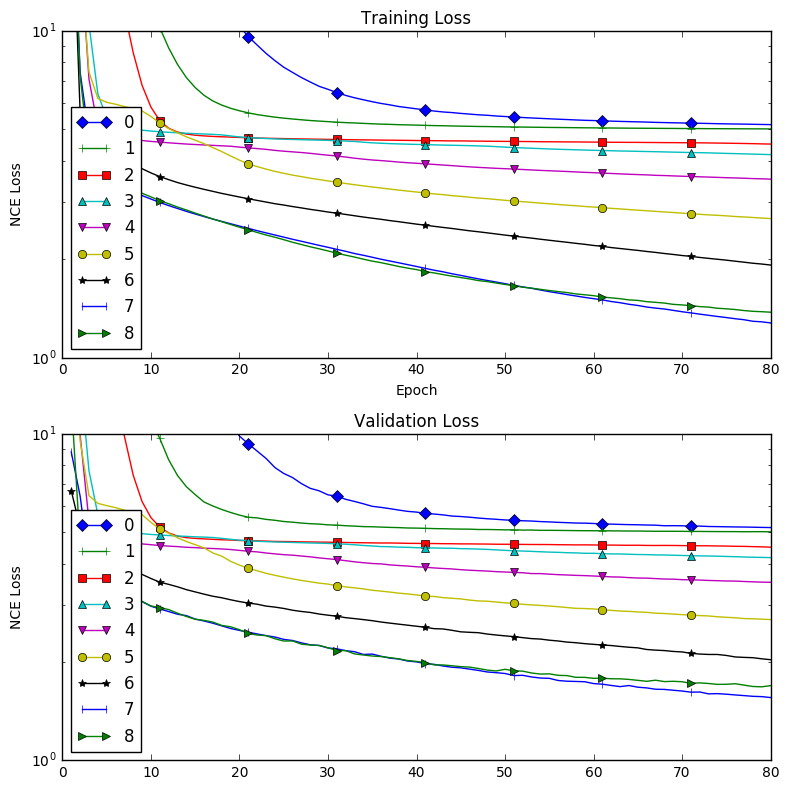

In [5]:
plot_results(results_list)

## Check Larger Learning Rates

**First round found best learn rate was 0.01, another round to check even larger learning rates**  

learn_rate = {0.1, 1, 10}  
momentum = {0.8, 0.9, 0.95}

In [6]:
results_list2= []
count = 0
for learn_rate in [0.1, 1, 10]:
    for momentum in [0.8, 0.9, 0.95]: 
        print('{}) learn_rate = {}, momentum = {}'
              .format(count, learn_rate, momentum))
        count += 1
        graph_params = {'batch_size': 32,
                        'vocab_size': np.max(x)+1,
                        'embed_size': 128,
                        'hid_size': 128,
                        'neg_samples': 64,
                        'learn_rate': learn_rate,
                        'momentum': momentum,
                        'embed_noise': 1,
                        'hid_noise': 0.3,
                        'optimizer': 'Momentum'}
        model = WindowModel(graph_params)
        results = model.train(x_train, y_train, x_val, y_val, epochs=80, verbose=False)
        results_list2.append((graph_params, results))

0) learn_rate = 0.1, momentum = 0.8
End Training: total batches = 551200. train loss = 1.75, val loss = 2.00
1) learn_rate = 0.1, momentum = 0.9
End Training: total batches = 551200. train loss = 3.65, val loss = 3.85
2) learn_rate = 0.1, momentum = 0.95
End Training: total batches = 551200. train loss = 7.54, val loss = 7.33
3) learn_rate = 1, momentum = 0.8
End Training: total batches = 551200. train loss = 16.90, val loss = 15.36
4) learn_rate = 1, momentum = 0.9
End Training: total batches = 551200. train loss = 30.60, val loss = 29.98
5) learn_rate = 1, momentum = 0.95
End Training: total batches = 551200. train loss = 62.22, val loss = 64.82
6) learn_rate = 10, momentum = 0.8
End Training: total batches = 551200. train loss = 162.79, val loss = 165.01
7) learn_rate = 10, momentum = 0.9
End Training: total batches = 551200. train loss = 310.38, val loss = 300.73
8) learn_rate = 10, momentum = 0.95
End Training: total batches = 551200. train loss = 633.32, val loss = 612.93


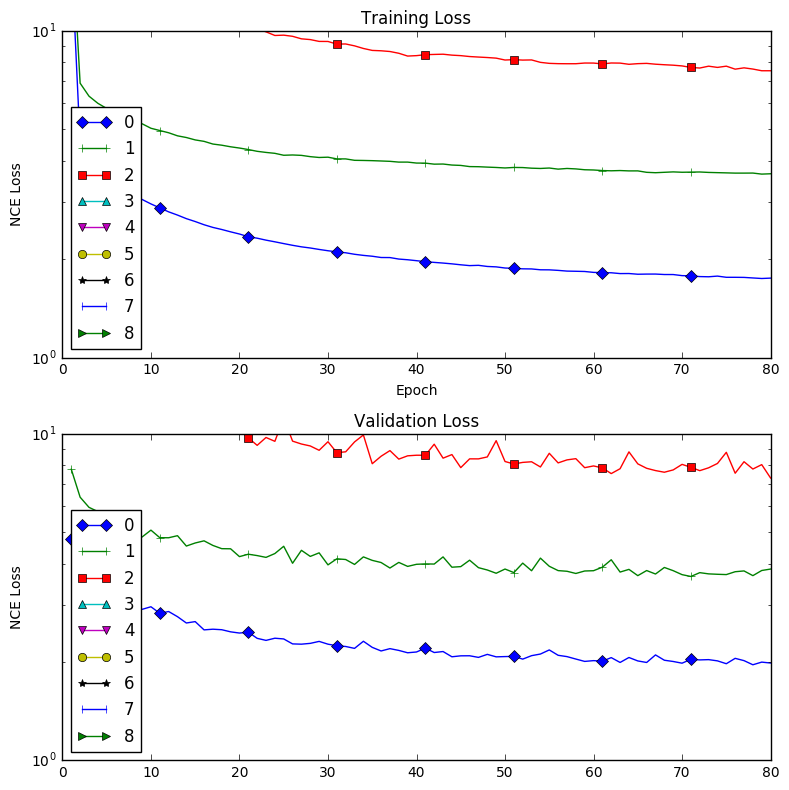

In [7]:
plot_results(results_list2)